In [192]:
import numpy as np
import surprise 

import sys
sys.path.append('../DeriveAlive/')

import DeriveAlive as da
import rootfinding as rf 
import optimize as opt
import spline as sp

# Demo 1: Declare Variables

### 1. Constant: 'None' has to be initialized as derivative, otherwise will be denoted as an $R^1$ variable

In [193]:
a = da.Var([1], None)
a

Var([1], None)

### 2. Scalar variables (two ways) and functions

In [194]:
# 1) The first way to denote a scalar varibale
x = da.Var([1])
x 

Var([1], [1])

In [195]:
# 2) The second way to denote a scalar variable
x = da.Var([1], [1])

In [196]:
# Denote a scalar function
f = 2 * x + np.sin(x)
f

Var([2.84147098], [2.54030231])

### 3. Vector variables and functions

###  1)  $R^3$ to $R^1$  function

In [197]:
x = da.Var([1], [1, 0, 0])
y = da.Var([2], [0, 1, 0])
z = da.Var([3], [0, 0, 1])
print('x: ',format(x))
print('y: ',format(y))
print('z: ',format(z))

x:  Var([1], [1 0 0])
y:  Var([2], [0 1 0])
z:  Var([3], [0 0 1])


In [198]:
f = x + y + z
print('Function f is ', f)

Function f is  Var([6], [1 1 1])


###  2)  $R^1$ to $R^3$  function

In [199]:
f = da.Var([x, y ** 2, z ** 4])
print(f)

Values:
[ 1  4 81],
Jacobian:
[[  1   0   0]
 [  0   4   0]
 [  0   0 108]]


###  3)  $R^3$ to $R^1$  function

In [200]:
x = da.Var([1])
f = da.Var([x, np.sin(x), np.exp(x-1)])
print('x: {}\n\n f: \n{}'.format(x, f))

x: Var([1], [1])

 f: 
Values:
[1.         0.84147098 1.        ],
Jacobian:
[[1.        ]
 [0.54030231]
 [1.        ]]


# Demo 2: Forward Mode

### 1)  $R^1$ to $R^1$  
Consider the case $f(x) = sin(x) + 5tan(\frac{x}{2})$, where we want to calculate the value and the first derivative of f(x) at $\frac{\pi}{2}$.

In [201]:
x = da.Var([np.pi/2])
f = np.sin(x) + 5 * np.tan(x/2) 
print('Value: {} Derivative: {}'.format(f.val, f.der))
print('Expect value of 6.0, derivative of 5.0')

Value: [6.] Derivative: [5.]
Expect value of 6.0, derivative of 5.0


### 2)  $R^m$ to $R^1$  

Consider the case $f(x, y) = (sin(x), x^2)$, where we want to calculate the value and jacobian of f(x) at $x = \frac{pi}{2}$.

In [202]:
x = da.Var([np.pi/2], [1])
f = da.Var([np.sin(x), x ** 2])
print('\n Value: {} \n\n Derivative: \n{}'.format(f.val, f.der))
print('\n Expect value of [1. 2.4674011], jacobian of [[0], [3.14159265]]')


 Value: [1.        2.4674011] 

 Derivative: 
[[6.12323400e-17]
 [3.14159265e+00]]

 Expect value of [1. 2.4674011], jacobian of [[0], [3.14159265]]


### 3)  $R^m$ to $R^n$  

Consider the case $f(x, y, z) = (sin(x), 4y + z^3)$, where we want to calculate the value and the jacobian of $f(x,y,z)$ at $x=\frac{pi}{2}$, $y=3$, $z=−2$.

In [203]:
x = da.Var([np.pi/2], [1, 0, 0])
y = da.Var([3], [0, 1, 0])
z = da.Var([-2], [0, 0, 1])
f = da.Var([np.sin(x), 4 * y + z ** 3])
print('\n Value: {} \n\n Derivative: \n{}'.format(f.val, f.der))
print('\n Expect value of [1, 4], jacobian of [[0 0 0], [0 4 12]]')


 Value: [1. 4.] 

 Derivative: 
[[6.123234e-17 0.000000e+00 0.000000e+00]
 [0.000000e+00 4.000000e+00 1.200000e+01]]

 Expect value of [1, 4], jacobian of [[0 0 0], [0 4 12]]


# Demo 3: Root Finding

### How to use DeriveAlive for Root Finding?
* Input function as a string
* Define start point
* Let DeriveAlive do the work to find the root
* DeriveAlive will nicely present you the trace fromm start point to the root

### Case 1:  $f = sin(x)$ with starting point $x_0= \frac{3\pi}{2}$
Note: Newton method is not guaranteed to converge when $f\prime(x_0)= 0$.
But in our case, we use flip coin to determine which direction we want to go in order to get stuck at this point, and choose a derivative of $\pm1$.

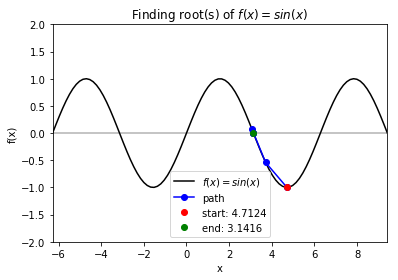

In [204]:
# define f function
f_string = 'f(x) = sin(x)'

def f(x):
    return np.sin(x)

# start at 3*pi/2 
x0 = 3*np.pi/2

# finding the root
for val in [np.pi - 0.25, np.pi, 1.5 * np.pi, 2 * np.pi - 0.25, 2 * np.pi + 0.25]:
    solution, x_path, y_path = rf.NewtonRoot(f, x0)

# visualize the trace
x_lims = -2 * np.pi, 3 * np.pi
y_lims = -2, 2
rf.plot_results(f, x_path, y_path, f_string, x_lims, y_lims)

### Case 2:   $f = x - \exp(-2\sin(4x)sin(4x)+0.3$ with starting point $x_0 = 0$

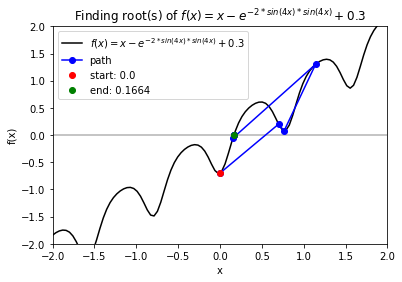

In [205]:
# define f function
f_string = 'f(x) = x - e^{-2 * sin(4x) * sin(4x)} + 0.3'

def f(x):
    return x - np.exp(-2.0 * np.sin(4.0 * x) * np.sin(4.0 * x)) + 0.3

# start at 0
x0 = 0

# finding the root
for val in np.arange(-0.75, 0.8, 0.25):
    solution, x_path, y_path = rf.NewtonRoot(f, x0)

# visualize the trace
x_lims = -2, 2
y_lims = -2, 2
rf.plot_results(f, x_path, y_path, f_string, x_lims, y_lims)

### Case 3: $f(x, y) = x^2 + 4y^2-2x^2y +4$ with starting points $x_0 =-8.0, y_0 = -5.0$ 

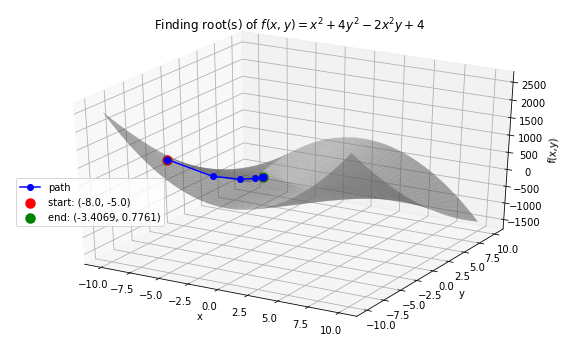

In [206]:
# define f function
f_string = 'f(x, y) = x^2 + 4y^2 -2x^2y + 4'

def f(variables):
    x, y = variables
    return x ** 2 + 4 * y ** 2 - 2 * (x ** 2) * y + 4

# start at x0=−8.0,y0= −5
x0 = -8.0
y0 = -5
init_vars = [x0, y0]

# finding the root and visualize the trace
solution, xy_path, f_path = rf.NewtonRoot(f, init_vars)
rf.plot_results(f, xy_path, f_path, f_string, threedim=True, speed=25)

### Case 4:  $f(x, y, z) = x^2 + y^2 + z^2$ with starting points $x_0 =1, y_0 = -2, z_0 = 5$ 

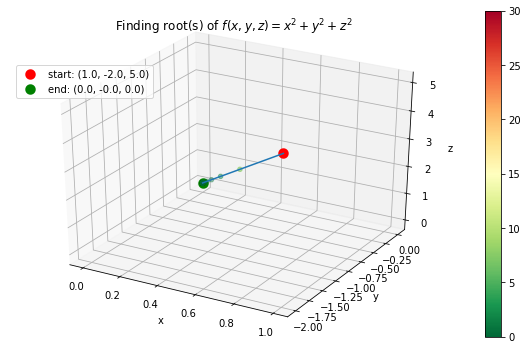

In [207]:
# define f function
f_string = 'f(x, y, z) = x^2 + y^2 + z^2'

def f(variables):
    x, y, z = variables
    return x ** 2 + y ** 2 + z ** 2

# start at 
x0= 1
y0= -2
z0= 5
init_vars = [x0, y0, z0]

# finding the root and visualize the trace
solution, xyz_path, f_path = rf.NewtonRoot(f, init_vars)
m = len(solution.val)
rf.plot_results(f, xyz_path, f_path, f_string, fourdim=True)

# Demo 4: Optimization

### Case 1: Minimize cost function of Machine Learing regression using Boston housing dataset 

In [208]:
# boston housing dataset
# # Standardized dataset: number of bedrooms, number of bathrooms, price
beds = []
baths = []
prices = []

with open('normalized.txt', 'r') as f:
    data = f.readlines()
    for row in data:
        values = row.split(',')
        beds.append(float(values[0]))
        baths.append(float(values[1]))
        prices.append(float(values[2]) / 1000.)
    beds = np.reshape(np.array(beds), [-1, 1])
    baths = np.reshape(np.array(baths), [-1, 1])
    prices = np.reshape(np.array(prices), [-1, 1])
    X = np.hstack((beds, baths, prices))

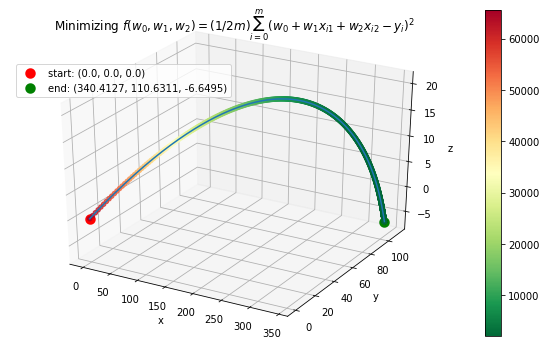

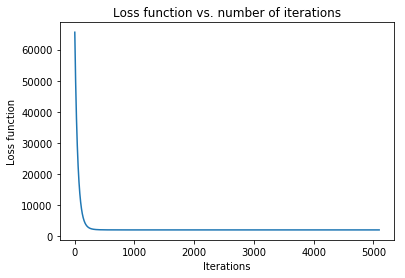

In [209]:
# define function 
f_string = 'f(w_0, w_1, w_2) = (1/2m)\sum_{i=0}^m (w_0 + w_1x_{i1} + w_2x_{i2} - y_i)^2'

# visulaize gradient descent
solution, w_path, f_path, f = opt.GradientDescent("mse", [0, 0, 0], data=X)
opt.plot_results(f, w_path, f_path, f_string, x_lims=(-7.5, 7.5), fourdim=True)

### Case 2: Minimize Easom's function

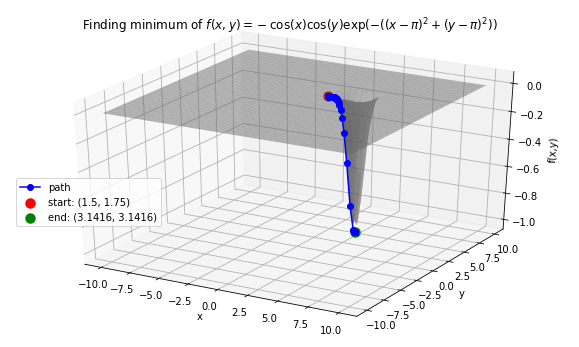

In [210]:
# define function
f_string = 'f(x, y) = -\cos(x)\cos(y)\exp(-((x-\pi)^2 + (y-\pi)^2))'

def f(variables):
    x, y = variables
    return -np.cos(x) * np.cos(y) * np.exp(-((x - np.pi) ** 2 + (y - np.pi) ** 2))

# define start point
x0 = 1.5
y0 = 1.75
init_vars = [x0, y0]

# visulaize gradient descent
solution, xy_path, f_path = opt.GradientDescent(f, init_vars, iters=10000, eta=0.3)
opt.plot_results(f, xy_path, f_path, f_string, threedim=True)

# Demo 5: Quadratic Spline

Plot the quadratic spline of $f_1(x) = 10^x, x \in [-1, 1]$ with 10 intervals.

0.0038642295476342416

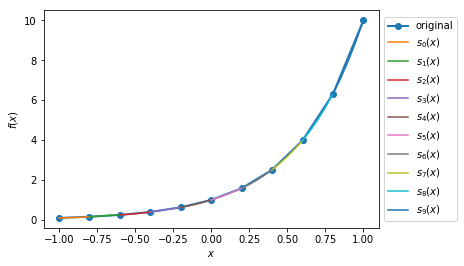

In [211]:
def f1(var):
    return 10**var

xMin1 = -1
xMax1 = 1
nIntervals1 = 10
nSplinePoints1 = 5

y1, A1, coeffs1, ks1 = sp.quad_spline_coeff(f1, xMin1, xMax1, nIntervals1)
fig1 = sp.quad_spline_plot(f1, coeffs1, ks1, nSplinePoints1)
spline_points1 = sp.spline_points(f1, coeffs1, ks1, nSplinePoints1)
sp.spline_error(f1, spline_points1)

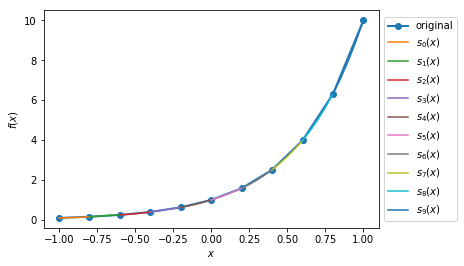

In [212]:
fig1

Plot the quadratic spline of $f_3(x) = \sin(x), x \in [-1,1]$ and $x \in [-\pi, \pi]$ with 5 intervals and 10 intervals.

0.015578205778177232

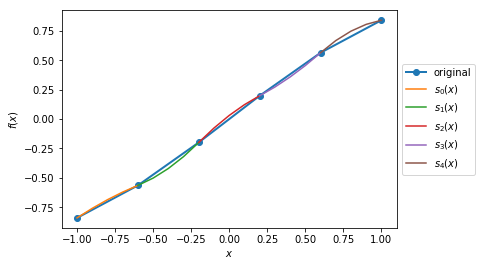

In [213]:
def f3(var):
    return np.sin(var)

xMin3 = -1
xMax3 = 1
nIntervals3 = 5
nSplinePoints3 = 5

y3, A3, coeffs3, ks3 = sp.quad_spline_coeff(f3, xMin3, xMax3, nIntervals3)
fig3 = sp.quad_spline_plot(f3, coeffs3, ks3, nSplinePoints3)
spline_points3 = sp.spline_points(f3, coeffs3, ks3, nSplinePoints3)
sp.spline_error(f3, spline_points3)

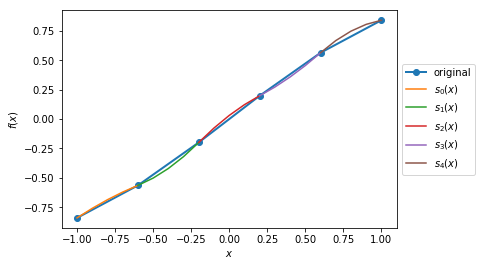

In [214]:
fig3

0.0034954287455489196

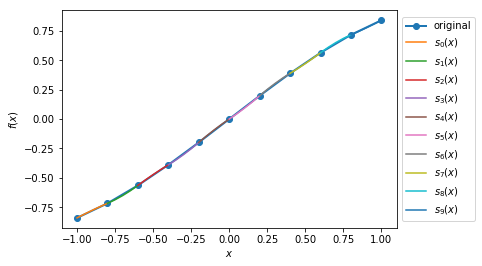

In [215]:
xMin4 = -1
xMax4 = 1
nIntervals4 = 10
nSplinePoints4 = 5

y4, A4, coeffs4, ks4 = sp.quad_spline_coeff(f3, xMin4, xMax4, nIntervals4)
fig4 = sp.quad_spline_plot(f3, coeffs4, ks4, nSplinePoints4)
spline_points4 = sp.spline_points(f3, coeffs4, ks4, nSplinePoints4)
sp.spline_error(f3, spline_points4)

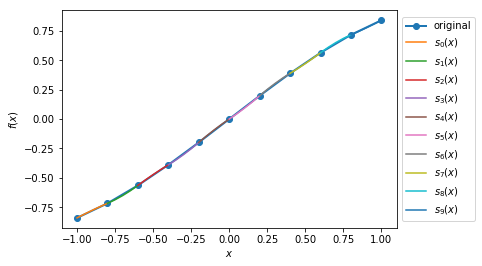

In [216]:
fig4

Adding more intervals does make the quadratic splines fit better. We will demonstrate this with $f(x) = 10^x, x \in [-\pi, \pi]$ at intervals from 5 to 100.

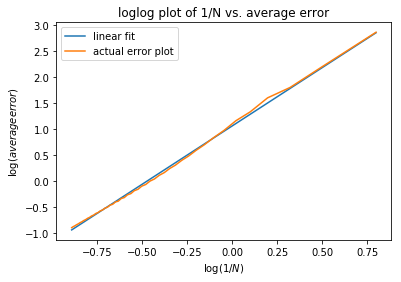

In [217]:
def f(var):
    return 10 ** var

xMin = -sp.np.pi
xMax = sp.np.pi
nIntervalsList = sp.np.arange(1, 50, 1)
nSplinePoints = 10
squaredErrorList = []

for nIntervals in nIntervalsList:
    y, A, coeffs, ks = sp.quad_spline_coeff(f, xMin, xMax, nIntervals)
    spline_points = sp.spline_points(f, coeffs, ks, nSplinePoints)
    error = sp.spline_error(f, spline_points)
    squaredErrorList.append(error)
    
plt.figure()
    
coefficients = np.polyfit(np.log10(2*np.pi/nIntervalsList), np.log10(squaredErrorList), 1)
polynomial = np.poly1d(coefficients)
ys = polynomial(np.log10(2*np.pi/nIntervalsList))
plt.plot(np.log10(2*np.pi/nIntervalsList), ys, label='linear fit')

# plt.loglog(2*np.pi/nIntervalsList, squaredErrorList)
plt.plot(np.log10(2*np.pi/nIntervalsList), np.log10(squaredErrorList), label='actual error plot')
plt.xlabel(r'$N$')
plt.ylabel('squared error')
plt.xlabel(r'$\log(1/N)$')
plt.ylabel(r'$\log(average error)$')
plt.legend()
plt.title('loglog plot of 1/N vs. average error')
plt.show()

In [218]:
beta, alpha = coefficients[0], 10**coefficients[1]

In [219]:
beta, alpha

(2.2462166565957835, 11.414027075895813)

# Extra: How to plot the following 20 functions?

$f_1(x) = \frac{-1}{0.5^2} x^2 + 1, x \in [-0.5, 0]$

$f_2(x) = \frac{1}{0.5^2} x^2 - 1, x \in [-0.5, 0]$

$f_3(x) = \frac{-1}{0.5} x^2 + 1, x \in [0, 0.5]$

$f_4(x) = \frac{1}{0.5} x^2 - 1, x \in [0, 0.5]$

$f_6(x) = \frac{-1}{0.5} (x-1.5)^2 + 1, x \in [1, 1.5]$

$f_7(x) = \frac{1}{0.5} (x-1.5)^2 - 1, x \in [1, 1.5]$

$f_8(x) = \frac{-1}{0.5} (x-1.5)^2, x \in [1.5, 2]$

$f_9(x) = \frac{-1}{0.5} (x-1.5)^2 + 1, x \in [1.5, 2]$

$f_{10}(x) = \frac{1}{0.5} (x-1.5)^2 - 1, x \in [1.5, 2]$

$f_{11}(x) = \frac{-1}{0.5} (x-3)^2 + 1, x \in [2.5, 3]$

$f_{12}(x) = \frac{-1}{0.5} (x-3)^2 + 1, x \in [3, 3.5]$

$f_{13}(x) = 1.5x - 4.75, x \in [2.5, 3.5]$

$f_{14}(x) = -1, x \in [2.5, 3.5]$

$f_{15}(x) = \frac{-1}{0.5^2} (x-4.5)^2 + 1, x \in [4, 4,5]$

$f_{16}(x) = \frac{1}{0.5^2} (x-4.5)^2 - 1, x \in [4, 4,5]$

$f_{17}(x) = \frac{-1}{0.5^2} (x-4.5)^2 + 1, x \in [4, 4,5]$

$f_{18}(x) = \frac{1}{0.5^2} (x-4.5)^2 - 1, x \in [4.5, 5]$

$f_{19}(x) = 1, x \in [5.5, 6.5]$

$f_{20}(x) = \frac{-1}{(-0.75)^2} (x-6.5)^2 + 1, x \in [5.75, 6.5]$

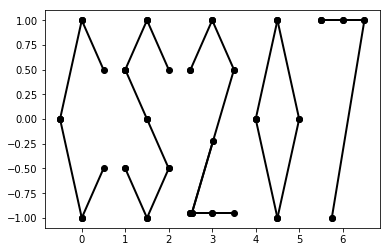

In [220]:
surprise.drawPoints()

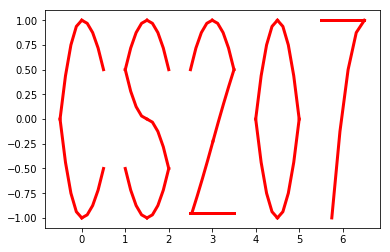

In [221]:
surprise.drawSpline()

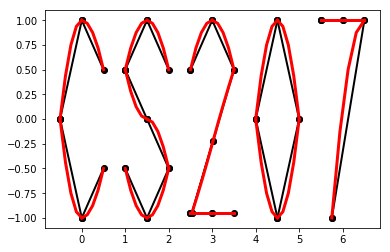

In [222]:
surprise.drawTogether()

In [223]:
pwd

'/Users/chenshi/Dropbox/Harvard/courses/2018Fall/CS207/cs207-FinalProject/demos'